# Data Wrangling Project

Harry Xiong

### Import packages

In [146]:
import pandas as pd
import numpy as np
import json
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt


## Gather

1. twitter-archive-enhanced.csv

In [21]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [22]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. image_predictions.tsv

In [23]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_pred = pd.read_csv(url, sep = '\t')

In [24]:
df_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. tweet_json.txt

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [119]:
data = []
with open('tweet-json.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [120]:
df_tweet = pd.DataFrame(data)

In [127]:
df_tweet.head(5)

,created_at,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [128]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 30 columns):
created_at                       2354 non-null object
tweet_id                         2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null object
place                            1 non-null ob

## Assess & Clean

In [150]:
#copy each data frame
df_archive_c = df_archive.copy()
df_pred_c = df_pred.copy()
df_tweet_c = df_tweet.copy()

Quality 1: only want original ratings (no retweets or replies) that have images

In [149]:
#Define: make the clean version only keep the rows with null for retweet status and reply status
#Code
df_archive_clean1 = df_archive_c[df_archive['retweeted_status_id'].isnull() & df_archive['in_reply_to_status_id'].isnull()]
#Test
df_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [152]:
#Define: drop vars because they are no longer useful
#Code
vars=['in_reply_to_status_id', 
      'in_reply_to_user_id', 
      'retweeted_status_id', 
      'retweeted_status_user_id',
      'retweeted_status_timestamp']
df_archive_clean1.drop(vars, axis=1, inplace=True)

In [153]:
#Test
df_archive_clean1.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Quality 2: make sure all ratings have denominators of 10

In [46]:
#observe the correctness of rating denominators
df_archive_clean1['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [154]:
#Define: keep only the ratings in correct rating format
#Code
df_archive_clean2 = df_archive_clean1[df_archive_clean1['rating_denominator'] == 10]


In [155]:
#Test
df_archive_clean2['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

Quality 3: make sure we are only keeping the dogs with proper names

In [48]:
#check names
df_archive_clean2['name'].value_counts()

None        592
a            54
Charlie      11
Lucy         11
Oliver       10
           ... 
Carper        1
Heinrich      1
Carly         1
Mack          1
Geno          1
Name: name, Length: 952, dtype: int64

In [72]:
#Define: remove rows with incorrect names
#Code:
df_archive_clean3 = df_archive_clean2[df_archive_clean2['name'] != 'None']
df_archive_clean3 = df_archive_clean3[df_archive_clean3['name'].str.islower() == False]

In [73]:
#Test
df_archive_clean3['name'].value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
            ..
Heinrich     1
Carly        1
Mack         1
Mosby        1
Geno         1
Name: name, Length: 927, dtype: int64

Quality 4: change timestamp to datetime object

In [75]:
df_archive_clean3.info()
#Define: change the non-null object to datetime object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null object
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
doggo                 1387 non-null object
floofer               1387 non-null object
pupper                1387 non-null object
puppo                 1387 non-null object
dtypes: int64(3), object(9)
memory usage: 140.9+ KB


In [76]:
#Code
df_archive_clean3['timestamp'] = pd.to_datetime(df_archive_clean3['timestamp'])

In [77]:
#Test
df_archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null datetime64[ns, UTC]
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
doggo                 1387 non-null object
floofer               1387 non-null object
pupper                1387 non-null object
puppo                 1387 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 140.9+ KB


Tidiness 1: combine the stages into one column

In [ ]:
#Define: change None to blank for string concatenation purpose
#Code
df_archive_clean3.doggo.replace('None', '', inplace=True) 
df_archive_clean3.floofer.replace('None', '', inplace=True) 
df_archive_clean3.pupper.replace('None', '', inplace=True) 
df_archive_clean3.puppo.replace('None', '', inplace=True)
df_archive_clean3['stage'] = df_archive_clean3.doggo + df_archive_clean3.floofer + df_archive_clean3.pupper + df_archive_clean3.puppo

In [81]:
#Code
df_archive_clean3.stage.replace('', 'Unknown', inplace=True)

In [82]:
#Test
df_archive_clean3.stage.value_counts()

Unknown        1203
pupper          121
doggo            38
puppo            16
floofer           5
doggopupper       4
Name: stage, dtype: int64

In [84]:
#Define: drop the irrelevant columns
#Code
df_archive_clean3.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [156]:
#Test
df_archive_clean3.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [86]:
#Define: separate the concatenated words
#Code
df_archive_clean3.loc[df_archive_clean3.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_archive_clean3.loc[df_archive_clean3.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_archive_clean3.loc[df_archive_clean3.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [87]:
#Test
df_archive_clean3.stage.value_counts()

Unknown          1203
pupper            121
doggo              38
puppo              16
floofer             5
doggo, pupper       4
Name: stage, dtype: int64

Quality 5: change image prediction column names to readable format

In [90]:
#Define: clean column names
#Code
df_pred_clean1 = df_pred_c.rename(columns={'p1':'prediction_1', 'p1_conf':'prediction_1_confidence', 'p1_dog':'prediction_1_dog', 
                                        'p2':'prediction_2', 'p2_conf':'prediction_2_confidence', 'p2_dog':'prediction_2_dog',
                                        'p3':'prediction_3', 'p3_conf':'prediction_3_confidence', 'p3_dog':'prediction_3_dog'})

In [91]:
#Test
df_pred_clean1.head(5)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Quality 6: unify all predictions to lower case

In [99]:
#Define: change to lower case
#Code
df_pred_clean1['prediction_1'] = df_pred_clean1['prediction_1'].str.lower()
df_pred_clean1['prediction_2'] = df_pred_clean1['prediction_2'].str.lower()
df_pred_clean1['prediction_3'] = df_pred_clean1['prediction_3'].str.lower()

In [100]:
#Test
df_pred_clean1.head(5)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Quality 7: change df_tweet's id column to tweet_id

In [123]:
#Define: rename column 'id' to 'tweet_id'
#Code
df_tweet.rename(columns={'id':'tweet_id'}, inplace=True)

In [124]:
#Test
df_tweet.head(5)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


Quality 8: get only tweet_id, retweet_count and favorite_count

In [131]:
#Define: only remain relevant columns
#Code
df_tweet_clean = df_tweet_c[['tweet_id', 'favorite_count', 'retweet_count']]

In [132]:
#Test
df_tweet_clean.head(5)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


Tidiness 2: merge three datasets

In [133]:
#Define: merge three datasets by merging two at a time
#Code
twitter_1 = pd.merge(df_tweet_clean, df_pred_clean1, on='tweet_id', how='inner')
twitter_final = pd.merge(twitter_1, df_archive_clean3, on='tweet_id', how='inner')

In [134]:
#Test
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 22 columns):
tweet_id                   1346 non-null int64
favorite_count             1346 non-null int64
retweet_count              1346 non-null int64
jpg_url                    1346 non-null object
img_num                    1346 non-null int64
prediction_1               1346 non-null object
prediction_1_confidence    1346 non-null float64
prediction_1_dog           1346 non-null bool
prediction_2               1346 non-null object
prediction_2_confidence    1346 non-null float64
prediction_2_dog           1346 non-null bool
prediction_3               1346 non-null object
prediction_3_confidence    1346 non-null float64
prediction_3_dog           1346 non-null bool
timestamp                  1346 non-null datetime64[ns, UTC]
source                     1346 non-null object
text                       1346 non-null object
expanded_urls              1346 non-null object
rating_numerator       

Summary:  
Quality 1: only want original ratings (no retweets or replies) that have images  
Quality 2: make sure all ratings have denominators of 10  
Quality 3: make sure we are only keeping the dogs with proper names  
Quality 4: change timestamp to datetime object  
Quality 5: change image prediction column names to readable format  
Quality 6: unify all predictions to lower case and change underscores to spaces  
Quality 7: change df_tweet's id column to tweet_id  
Quality 8: get only tweet_id, retweet_count and favorite_count  
Tidiness 1: combine the stages into one column  
Tidiness 2: merge three datasets

## Store, Analyze and Visualize

In [136]:
#Define: store the final data frame 
#Code
twitter_archive_master = twitter_final
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [137]:
#Test
twitter_final.head(5)

,tweet_id,favorite_count,retweet_count,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,...,prediction_3_confidence,prediction_3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,...,0.076110,False,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,...,0.068957,True,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,...,0.031379,True,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,...,0.040836,False,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,...,0.175219,True,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


Analysis 1: what is the top-rated dog like?

In [139]:
#Define: sort the df in descending order
#Code
twitter_final.sort_values(by='rating_numerator', ascending=False)

,tweet_id,favorite_count,retweet_count,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,...,prediction_3_confidence,prediction_3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
575,749981277374128128,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,...,0.050776,False,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,Unknown
403,786709082849828864,20296,7069,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,pomeranian,0.467321,True,persian_cat,0.122978,...,0.102654,True,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,Unknown
442,778027034220126208,7320,1885,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,...,0.006519,True,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
253,821407182352777218,13075,5053,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,irish_setter,0.505496,True,vizsla,0.168747,...,0.111311,True,2017-01-17 17:21:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo
361,794205286408003585,10314,3895,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,...,0.020371,False,2016-11-03 15:51:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,pupper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,670055038660800512,716,357,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,...,0.031839,False,2015-11-27 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,Unknown
443,777885040357281792,7078,1893,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,afghan_hound,0.123529,True,basset,0.119682,...,0.108709,True,2016-09-19 15:00:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,Unknown
1099,674265582246694913,1766,936,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,...,0.000097,False,2015-12-08 16:33:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,Unknown
1033,678424312106393600,5916,2880,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,maltese_dog,0.759945,True,toy_poodle,0.101194,...,0.056037,True,2015-12-20 03:58:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,Unknown


The top-scored dog is named Atticus, an outlier with the score of 1776. Interestingly, three computer predictions predicted it to be not a dog.

Analysis 2: what is the rate of computer predicting it as a dog as the first predictions?

In [141]:
#Define: observe value counts
#Code
twitter_final['prediction_1_dog'].value_counts()

True     1042
False     304
Name: prediction_1_dog, dtype: int64

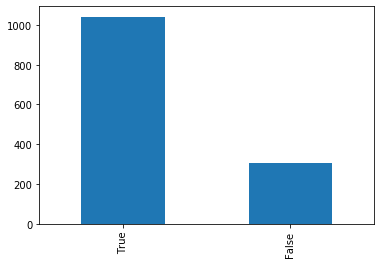

In [161]:
#Visual
twitter_final['prediction_1_dog'].value_counts().plot.bar()

In [142]:
#calculate rate
1042/1346

0.774145616641902

Analysis 3: what is the most frequent stage of a dog?

In [143]:
#observe value counts
twitter_final['stage'].value_counts()

Unknown          1169
pupper            117
doggo              36
puppo              15
floofer             5
doggo, pupper       4
Name: stage, dtype: int64

Most dogs are at an unknown stage

Analysis 4: 5 most frequent predictions by computer

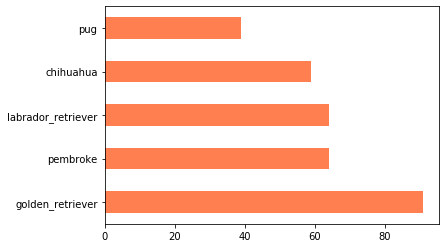

In [147]:
twitter_final['prediction_1'].value_counts().head(5).plot(kind='barh',color='coral')

The most predicted dog breed is golden_retriever

Analysis 5: Correlation between retweet and favorite

Text(0, 0.5, 'Favorite Count')

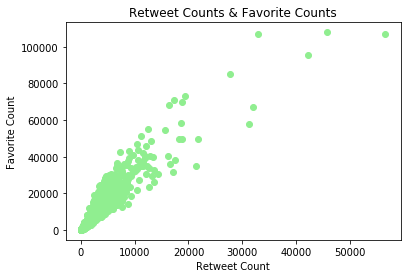

In [163]:
#Define: have a scatter plot to represent the correlation between counts of retweet and favorite
#Code
x = twitter_final['retweet_count']
y = twitter_final['favorite_count']
plt.scatter(x,y,color='lightgreen')
plt.title('Retweet Counts & Favorite Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

We can see a positive correlation between retween count and favorite count